#**Project Introduction:**

**Objective: Provide an overview of the machine learning project focused on pregnancy risk prediction.**

##**Agenda:**

**Introduction to the importance of maternal health monitoring.
Overview of the project's objectives and goals. Emphasize the significance of maternal health monitoring in ensuring the well-being of both expecting mothers and unborn children.Highlight real-world scenarios where early detection and intervention have proven critical. Share relevant statistics and case studies illustrating the impact of effective maternal health care.**


#**Project Name : Maternal Health Risk**

##**Problem statement**

**Pregnancy is a important phase in a woman's life, demanding meticulous monitoring of maternal health to ensure the well-being of both the expecting mother and the unborn child. Complications during pregnancy can pose serious risks, necessitating early detection and intervention. This notebook is dedicated to leveraging machine learning methods to forecast the risk levels of pregnant women by analyzing essential health attributes.**

**The primary objective is to develop a predictive model that assesses the potential risks associated with pregnancy based on a set of crucial health indicators. These indicators may include maternal age, medical history, lifestyle factors, and various physiological parameters. The model aims to provide healthcare professionals with a tool to identify high-risk pregnancies early on, allowing for timely interventions and personalized care plans.**

**The analysis will involve exploring diverse datasets containing information on pregnant women, encompassing variables such as blood pressure, glucose levels, BMI, and genetic factors. The machine learning algorithms employed will be trained to recognize patterns and relationships within the data, enabling the model to make accurate predictions regarding the likelihood of complications during pregnancy.**

**Dataset link** : https://www.kaggle.com/datasets/csafrit2/maternal-health-risk-data


#**Data Description**

**Age:** **Represents the age of pregnant women in years.**

**Systolic Blood Pressure (SystolicBP):** **The upper value of Blood Pressure measured in millimeters of mercury (mmHg). Systolic blood pressure is a significant attribute during pregnancy.**

**Diastolic Blood Pressure (DiastolicBP):** **The lower value of Blood Pressure measured in millimeters of mercury (mmHg). Diastolic blood pressure is another significant attribute during pregnancy.**

**Blood Glucose Levels (BS):** **Blood glucose levels expressed in terms of a molar concentration, measured in millimoles per liter (mmol/L).**

**Body Temperature (BodyTemp):** **Represents the body temperature of pregnant women, measured in degrees Fahrenheit (F).**

**Heart Rate:** **A normal resting heart rate of pregnant women, measured in beats per minute (bpm).**

**Risk Level:** **Predicted Risk Intensity Level during pregnancy, considering the previous health attributes. This is the target variable for risk prediction.**

In [ ]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/project/models/All model and dataset/Meternal Health Risk/Maternal Health Risk Data Set.csv')

In [ ]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


##**Data Description**

#Descriptive Statistics

In [ ]:
df.shape

(1014, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


**Understanding statistical data summaries**

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1014.0,29.871795,13.474386,10.0,19.0,26.0,39.0,70.0
SystolicBP,1014.0,113.198225,18.403913,70.0,100.0,120.0,120.0,160.0
DiastolicBP,1014.0,76.460552,13.885796,49.0,65.0,80.0,90.0,100.0
BS,1014.0,8.725986,3.293532,6.0,6.9,7.5,8.0,19.0
BodyTemp,1014.0,98.665089,1.371384,98.0,98.0,98.0,98.0,103.0
HeartRate,1014.0,74.301775,8.088702,7.0,70.0,76.0,80.0,90.0


**Checking for missing values in the dataset**

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64




<Axes: >

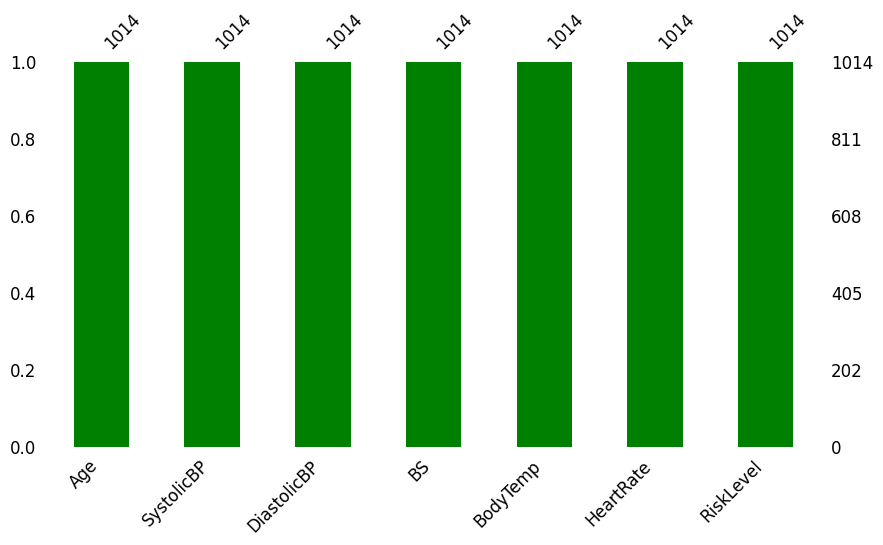

In [ ]:
print(df.isnull().sum())
print('\n')
msno.bar(df,color = 'g',figsize=(10,5), fontsize=12)

*   No Missing Values

##**EDA**

**Univarient, Bivarient and multivarient Analysis**

In [ ]:
# Numerical variables
numerical_columns = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']
categorical_columns = ['RiskLevel']

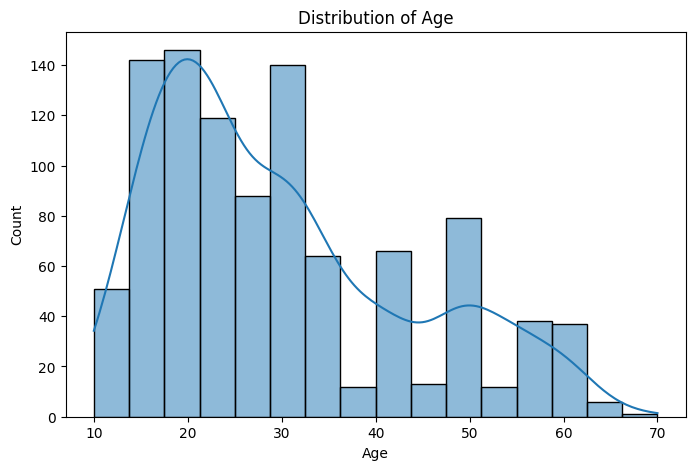

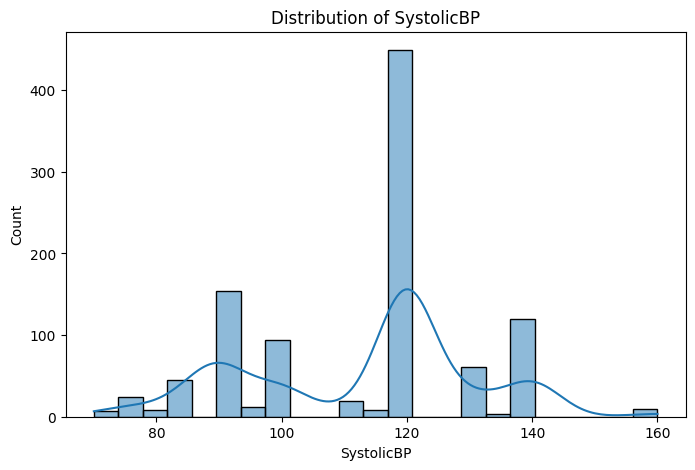

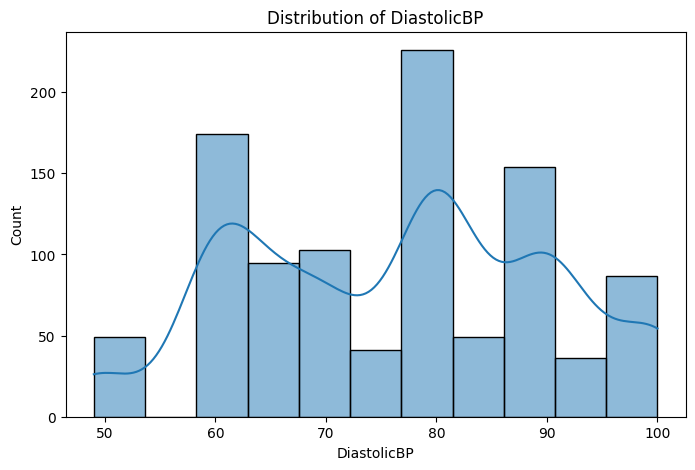

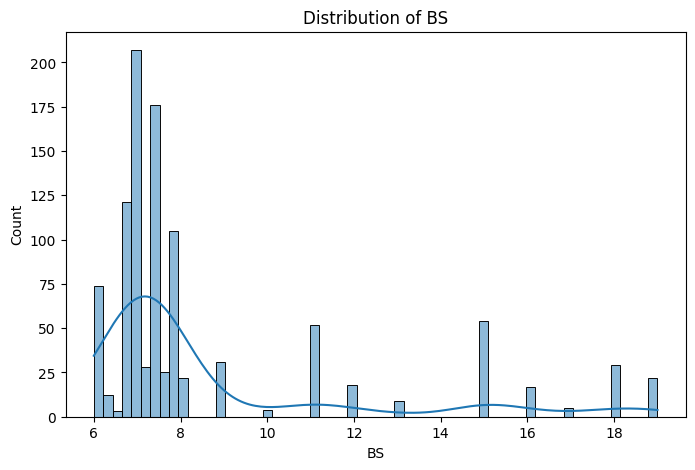

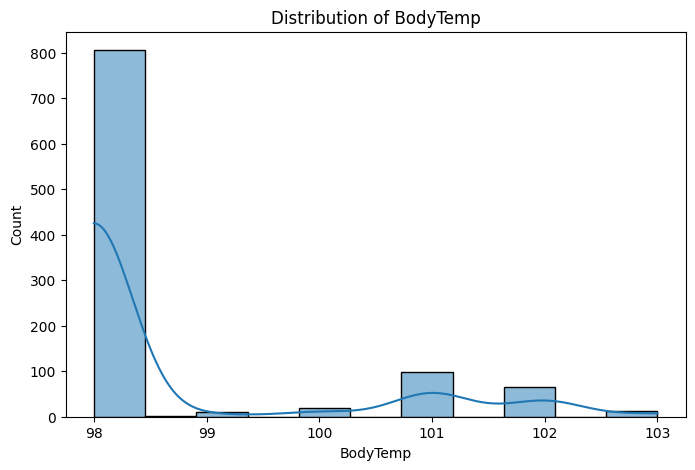

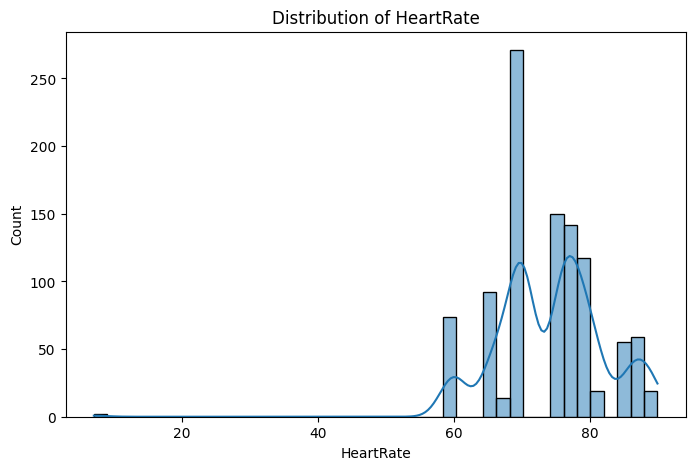

In [ ]:
#Plot 1: Univariate analysis for numerical variables
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

*   Low risk counts are high which means more people are low risk than compare to mid and high risk


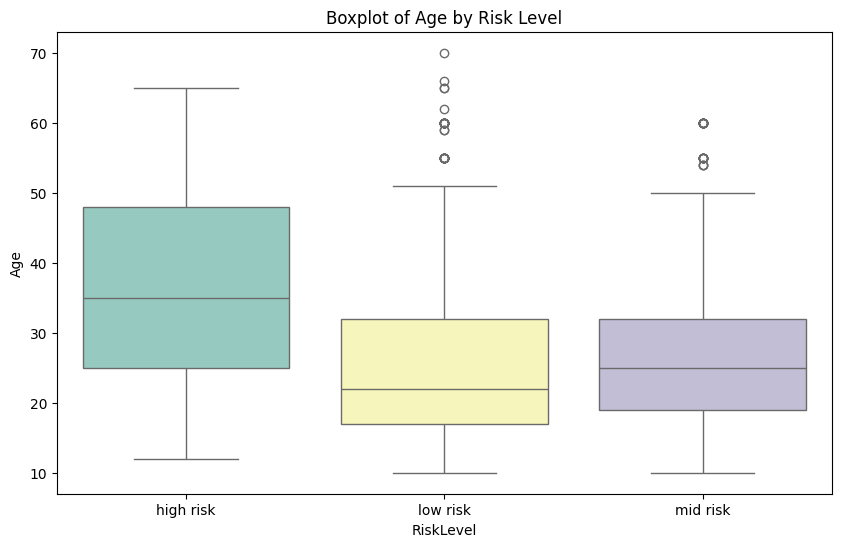

In [ ]:
# Plot 2: Boxplot for Age and RiskLevel
plt.figure(figsize=(10, 6))
sns.boxplot(x="RiskLevel", y="Age", data=df, palette="Set3")
plt.title("Boxplot of Age by Risk Level")
plt.show()


*   The boxplot shows that people with a low risk level tend to be younger than people with a high risk level. The median age for people with a low risk level is around 30 years old, while the median age for people with a high risk level is around 50 years old.

*   There is a wider range of ages for people with a high risk level than for people with a low risk level. The interquartile range (IQR) for people with a low risk level is about 20 years, while the IQR for people with a high risk level is about 30 years. This suggests that there is more variability in the ages of people with a high risk level.


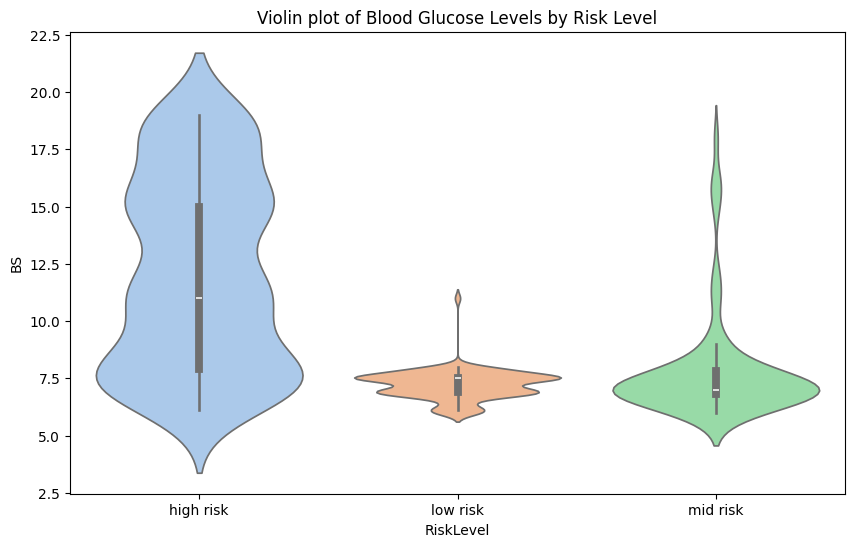

In [ ]:
# Plot 4: Violin plot for Blood Glucose Levels and RiskLevel
plt.figure(figsize=(10, 6))
sns.violinplot(x="RiskLevel", y="BS", data=df, palette="pastel")
plt.title("Violin plot of Blood Glucose Levels by Risk Level")
plt.show()

*   People with high risk of diabetes are more likely to have higher blood sugar levels than those with low risk. This is shown by the wider spread of the violin-shaped distribution for the high-risk group compared to the low-risk group.

*   There is some overlap in blood sugar levels between the different risk groups.

*   The median blood sugar level is higher for the high-risk group than for the low-risk group. This is shown by the thicker black line in the middle of the violin for the high-risk group compared to the low-risk group.

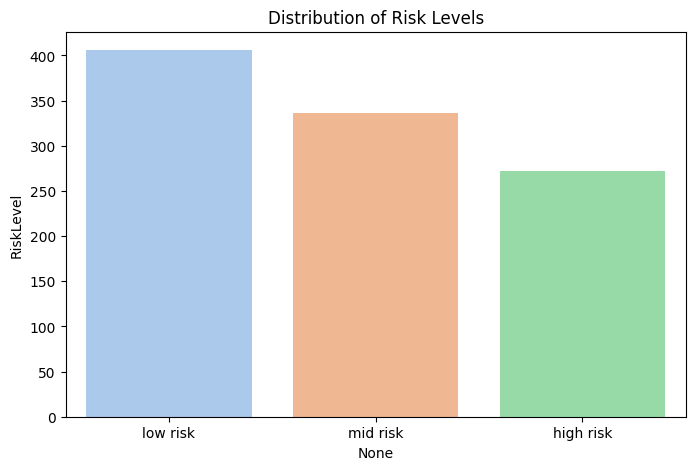

In [ ]:
# Plot 4: Bar plot for RiskLevel distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=df["RiskLevel"].value_counts().index, y=df["RiskLevel"].value_counts(), palette="pastel")
plt.title("Distribution of Risk Levels")
plt.show()


*   The most frequent risk level is "low risk," followed by "mid risk" and then "high risk."

*   This suggests that a majority of the data points fall under the lower risk categories.

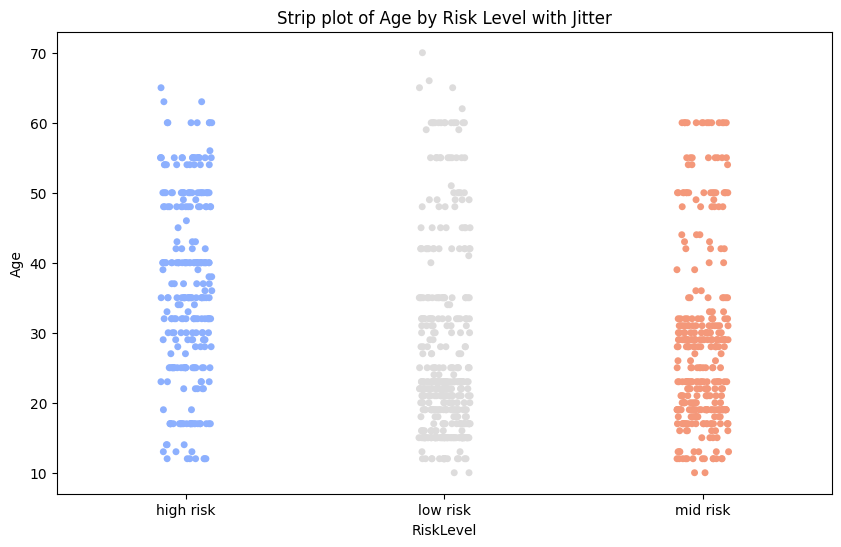

In [ ]:
# Plot 5: Strip plot for Age and RiskLevel with jitter
plt.figure(figsize=(10, 6))
sns.stripplot(x="RiskLevel", y="Age", data=df, palette="coolwarm", jitter=True)
plt.title("Strip plot of Age by Risk Level with Jitter")
plt.show()

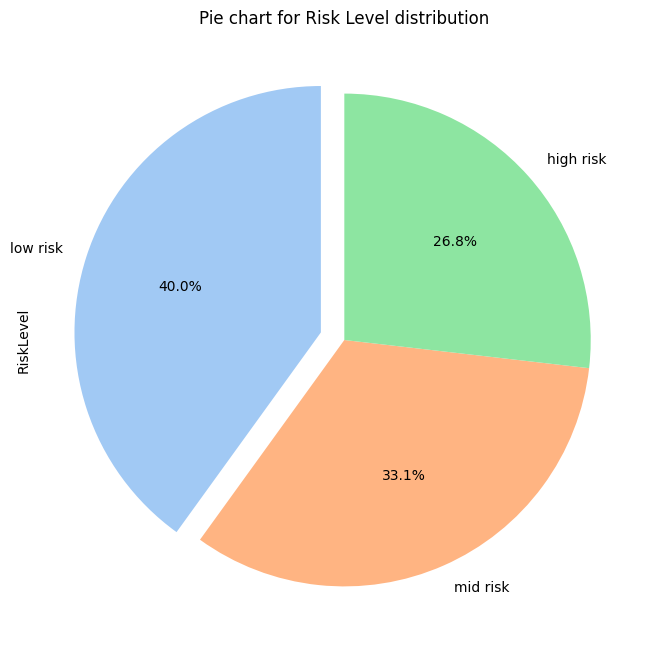

In [ ]:
# Plot 6: Pie chart for RiskLevel distribution
plt.figure(figsize=(8, 8))
df["RiskLevel"].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"), explode=(0.1, 0, 0))
plt.title("Pie chart for Risk Level distribution")
plt.show()


*   The majority of the data points fall under the mid risk category, accounting for 40.0% of the total.
*   High risk and low risk share almost equal proportions, at 33.1% and 26.8%, respectively.



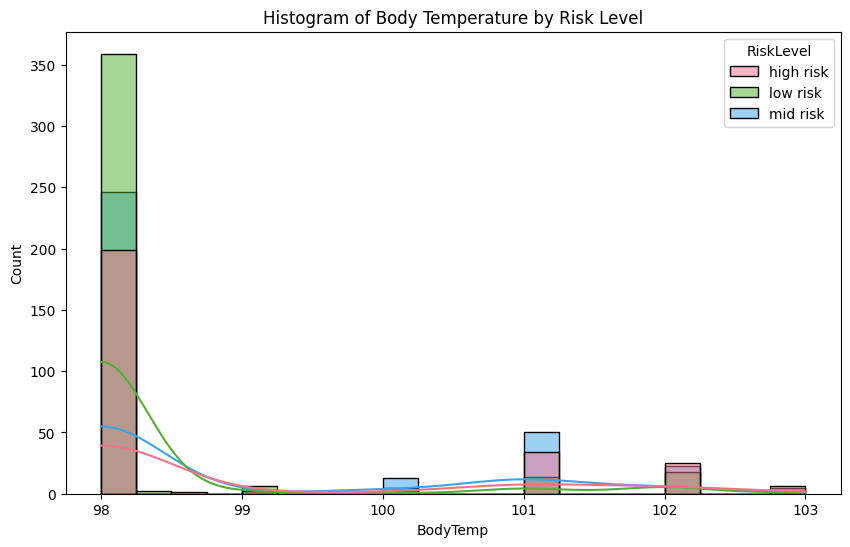

In [ ]:
# Plot 7: Histogram for Body Temperature by RiskLevel
plt.figure(figsize=(10, 6))
sns.histplot(df, x="BodyTemp", hue="RiskLevel", kde=True, palette="husl", bins=20)
plt.title("Histogram of Body Temperature by Risk Level")
plt.show()

*   Most of the data points fall under 98 Fahrenheit degrees and maximum body temperature fall under 103.


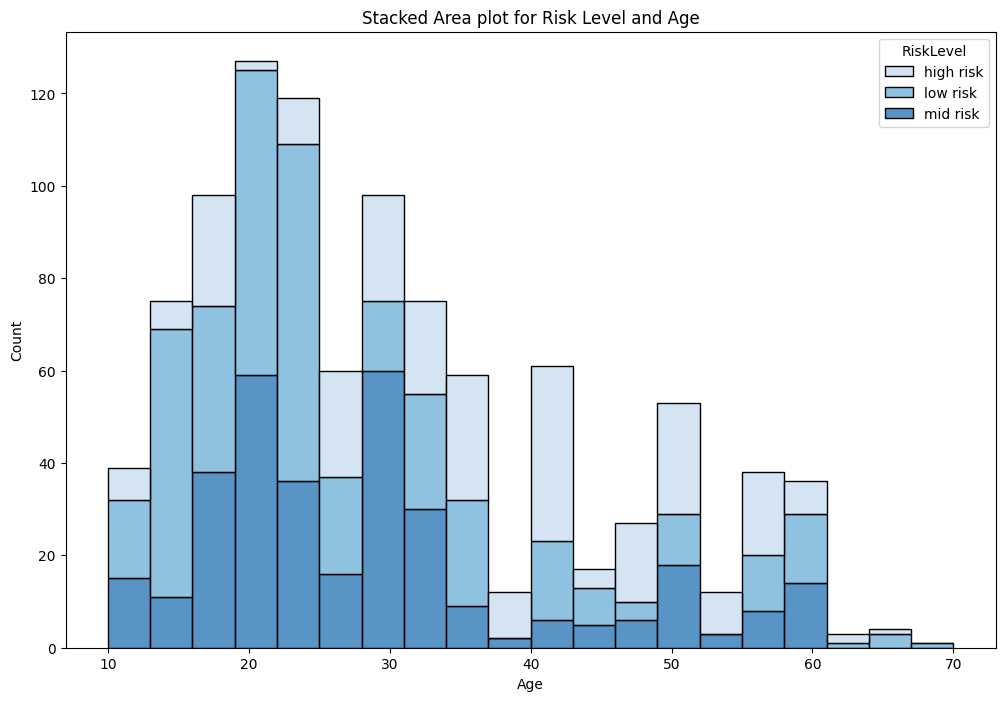

In [ ]:
# Plot 8: Stacked Area plot for RiskLevel and Age
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x="Age", hue="RiskLevel", multiple="stack", palette="Blues", bins=20)
plt.title("Stacked Area plot for Risk Level and Age")
plt.show()

*   Overall, the plot suggests that younger people tend to have a lower risk level than older people.

*   It's important to note that the plot does not show any causal relationships between age and risk level. It is possible that other factors, such as health or lifestyle choices, also play a role in determining a person's risk level.

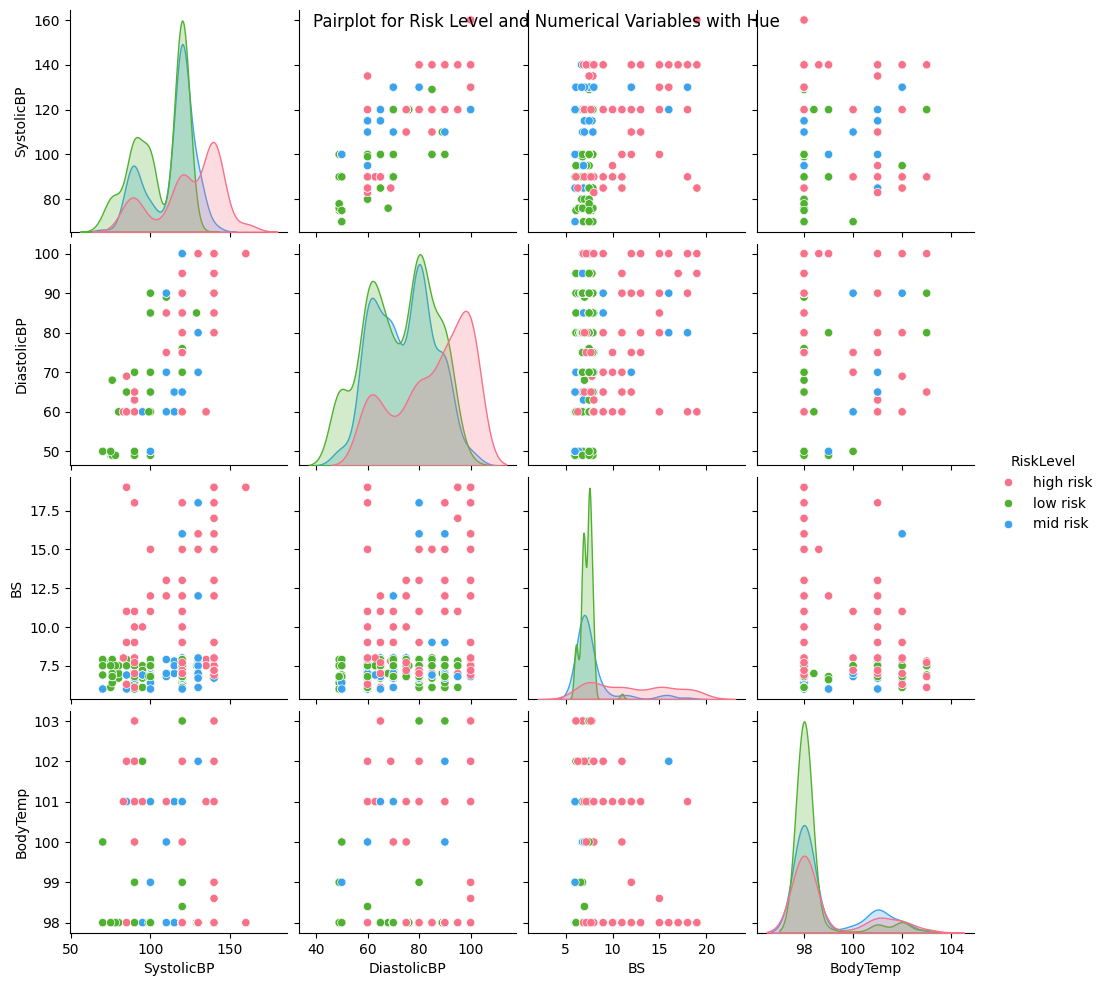

In [ ]:
# Plot 9: Pairplot for RiskLevel and numerical variables with hue
sns.pairplot(df, hue="RiskLevel", palette="husl", vars=["SystolicBP", "DiastolicBP", "BS", "BodyTemp"])
plt.suptitle("Pairplot for Risk Level and Numerical Variables with Hue")
plt.show()

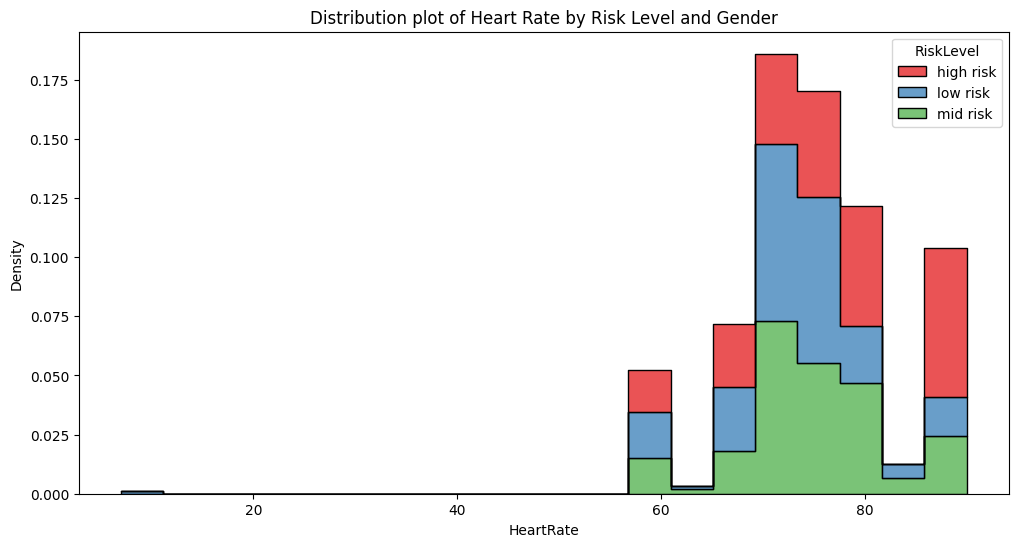

In [ ]:
# Plot 10: Distribution plot for Heart Rate by RiskLevel and Gender
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x="HeartRate", hue="RiskLevel", multiple="stack", element="step", stat="density", common_norm=False, palette="Set1", bins=20)
plt.title("Distribution plot of Heart Rate by Risk Level and Gender")
plt.show()

*   There is a wider range of heart rates for people with high risk than for people with low risk. This is shown by the wider boxes for the "high risk" group compared to the "low risk" group. This suggests that there is more variability in heart rates for people with high risk.


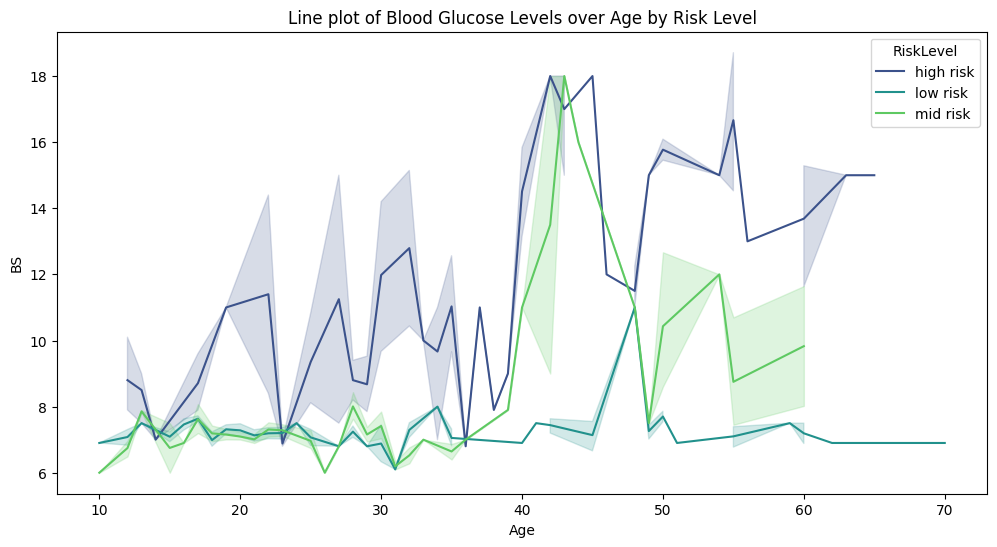

In [ ]:
# Plot 11: Line plot for Blood Glucose Levels over Age by RiskLevel
plt.figure(figsize=(12, 6))
sns.lineplot(x="Age", y="BS", hue="RiskLevel", data=df, palette="viridis")
plt.title("Line plot of Blood Glucose Levels over Age by Risk Level")
plt.show()



*   There is a positive correlation between age and blood glucose levels for all risk levels. This means that people tend to have higher blood glucose levels as they get older. This is shown by the upward trend of the lines in the plot.

*   People with high risk tend to have higher blood glucose levels than people with low or medium risk at all ages. This is shown by the higher position of the blue line (high risk).
*   The difference in blood glucose levels between risk levels appears to increase with age. This is shown by the wider gap between the lines as age increases.


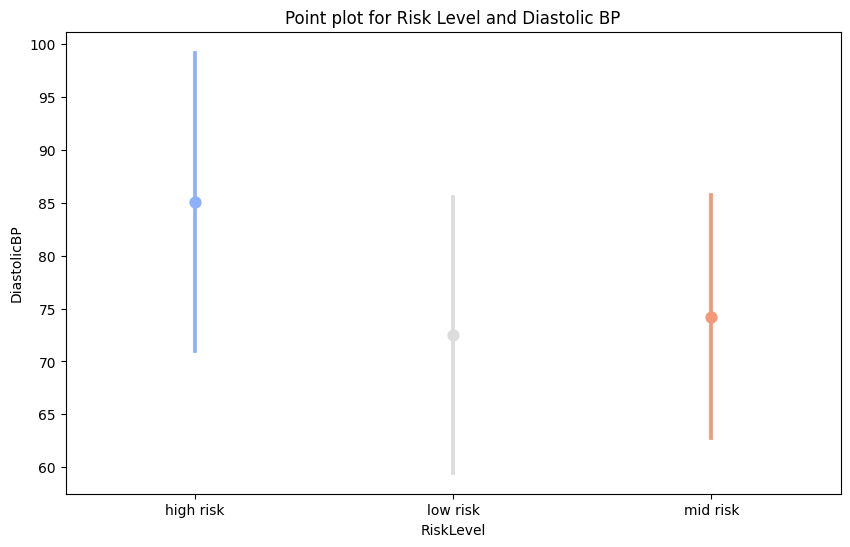

In [ ]:
# Plot 12: Point plot for Risk Level and Diastolic BP
plt.figure(figsize=(10, 6))
sns.pointplot(x="RiskLevel", y="DiastolicBP", data=df, ci="sd", palette="coolwarm")
plt.title("Point plot for Risk Level and Diastolic BP")
plt.show()

*   High risk of people has a diastolicBP of 85. Low risk of people has a diastolicBP of 73. Mid risk of people has a diastolicBP of 75

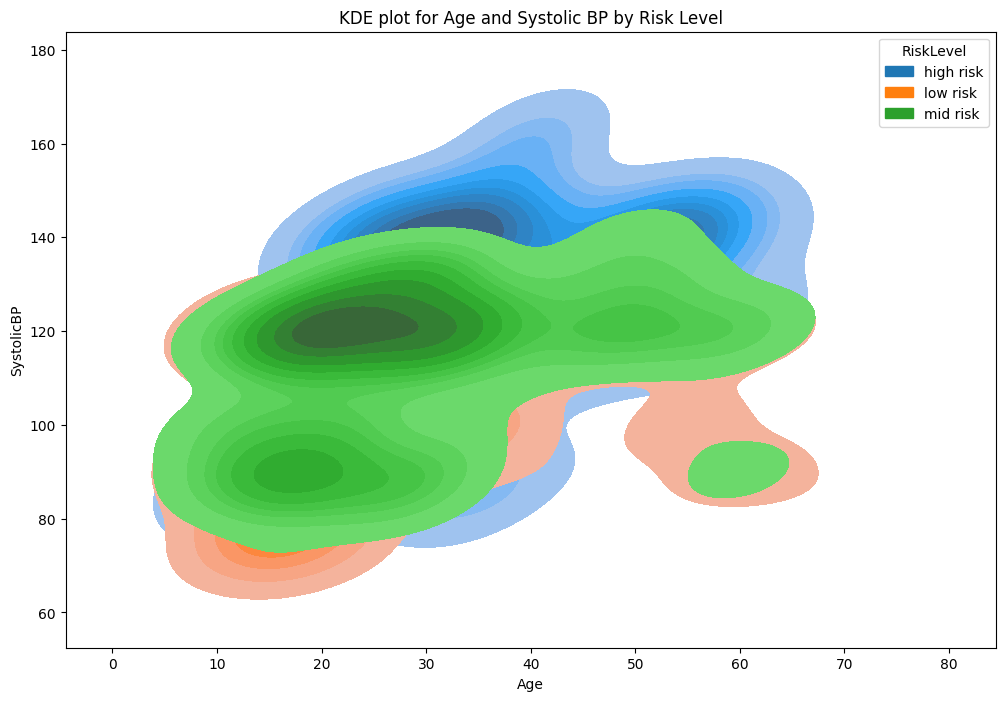

In [ ]:
# Plot 13: KDE plot for Age and SystolicBP by RiskLevel
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df, x="Age", y="SystolicBP", hue="RiskLevel", fill=True, cmap="Blues", common_norm=False)
plt.title("KDE plot for Age and Systolic BP by Risk Level")
plt.show()

*   In this datasets most people has systolicBP of mid risk level.


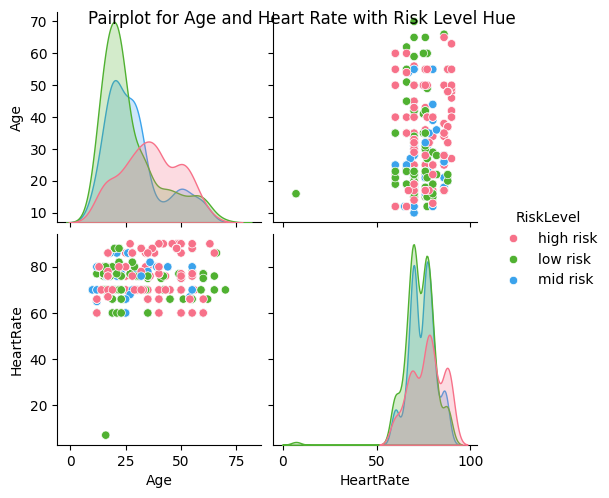

In [ ]:
# Plot 14: Pairplot for Age and Heart Rate with RiskLevel hue
sns.pairplot(df, hue="RiskLevel", palette="husl", vars=["Age", "HeartRate"])
plt.suptitle("Pairplot for Age and Heart Rate with Risk Level Hue")
plt.show()

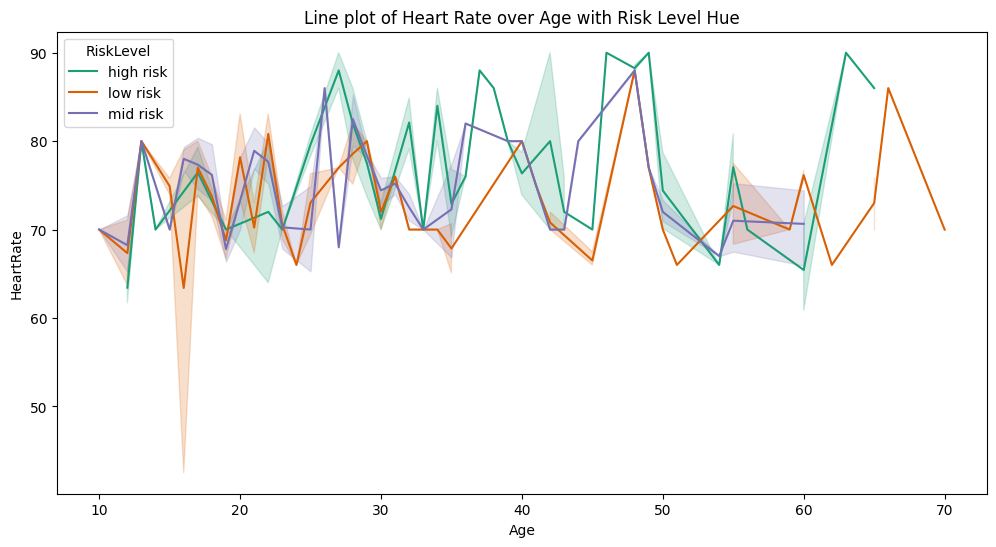

In [ ]:
# Plot 15: Line plot for Heart Rate over Age with RiskLevel hue
plt.figure(figsize=(12, 6))
sns.lineplot(x="Age", y="HeartRate", hue="RiskLevel", data=df, palette="Dark2")
plt.title("Line plot of Heart Rate over Age with Risk Level Hue")
plt.show()

*   People between 30 to 40  year of age has an heartrate high than compare to other ages


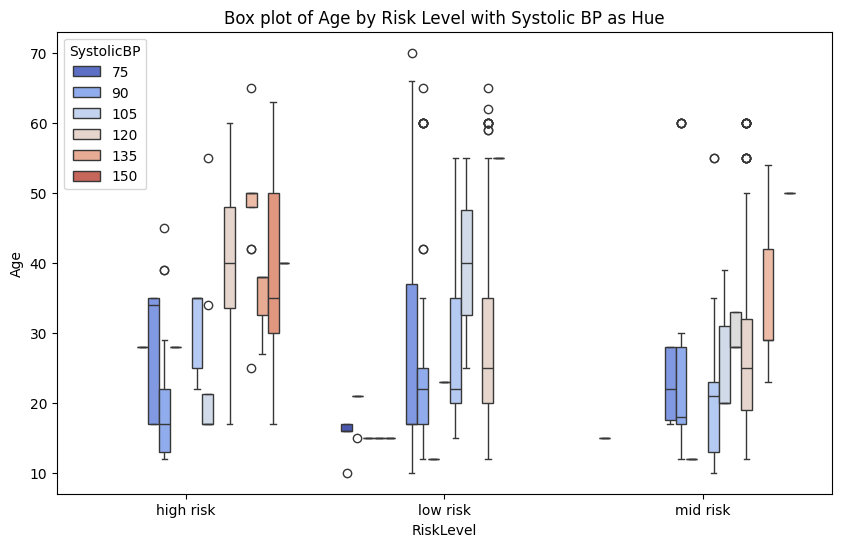

In [ ]:
# Plot 16: Pointplot for Age and RiskLevel with Hue
plt.figure(figsize=(10, 6))
sns.boxplot(x="RiskLevel", y="Age", hue="SystolicBP", data=df, palette="coolwarm")
plt.title("Box plot of Age by Risk Level with Systolic BP as Hue")
plt.show()


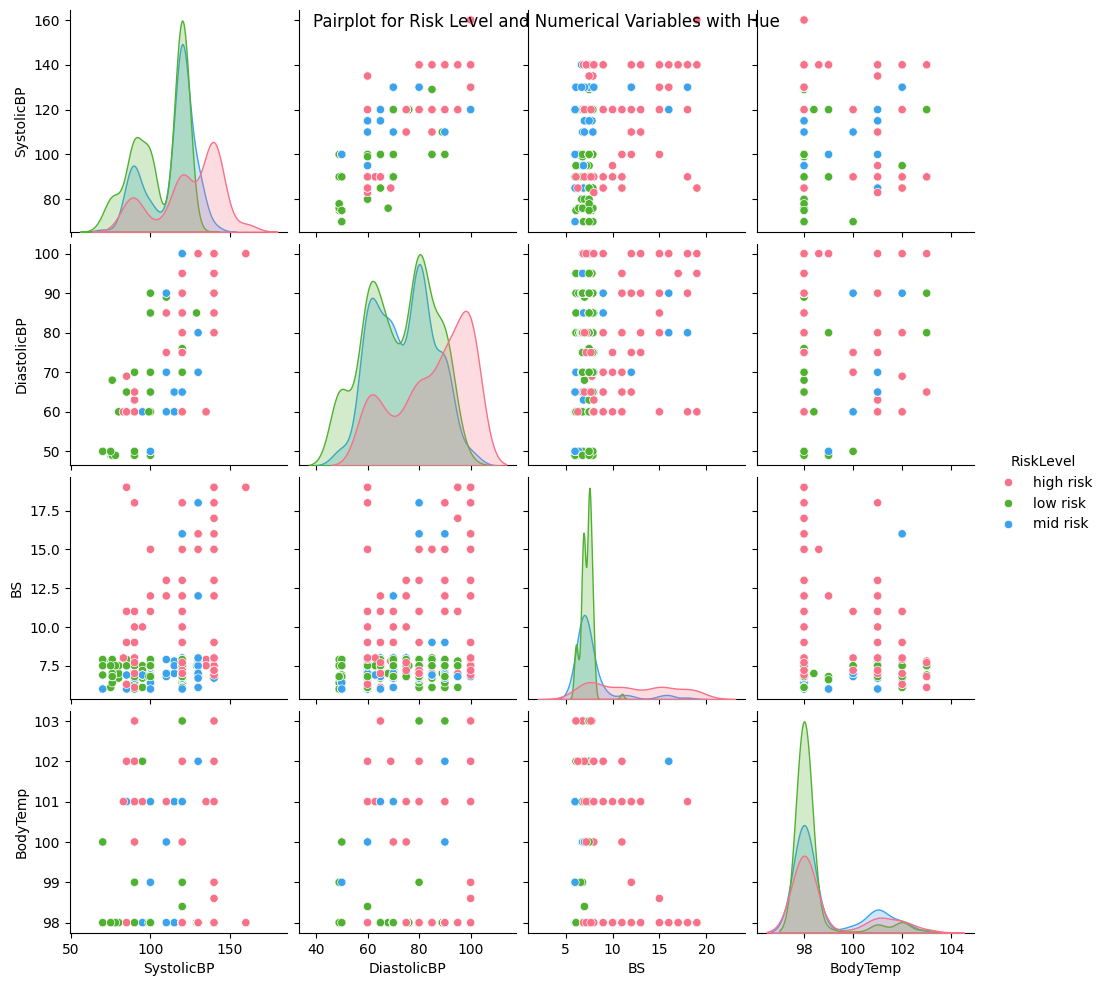

In [ ]:
# Plot 17: Pairplot for RiskLevel and numerical variables with hue
sns.pairplot(df, hue="RiskLevel", palette="husl", vars=["SystolicBP", "DiastolicBP", "BS", "BodyTemp"])
plt.suptitle("Pairplot for Risk Level and Numerical Variables with Hue")
plt.show()

##**Feature Engineer**

In [ ]:
# Selected feature engineering examples
df['AgeSquared'] = df['Age'] ** 2
df['HeartRateOverBodyTemp'] = df['HeartRate'] / df['BodyTemp']
df['BloodPressureRatio'] = df['SystolicBP'] / df['DiastolicBP']
df['AgeBMIProduct'] = df['Age'] * (df['BS'] / (df['BodyTemp'] ** 2))
df['BloodPressureDeviation'] = df['SystolicBP'] - df['DiastolicBP']
df['BloodSugarSquared'] = df['BS'] ** 2
df['RiskScore'] = (df['Age'] * df['SystolicBP']) / (df['DiastolicBP'] + df['HeartRate'])
df['BodyTempOverHeartRate'] = df['BodyTemp'] / df['HeartRate']
df['BloodPressureDiff'] = df['SystolicBP'] - df['DiastolicBP']

In [ ]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,AgeSquared,HeartRateOverBodyTemp,BloodPressureRatio,AgeBMIProduct,BloodPressureDeviation,BloodSugarSquared,RiskScore,BodyTempOverHeartRate,BloodPressureDiff
0,25,130,80,15.0,98.0,86,high risk,625,0.877551,1.625000,0.039046,50,225.00,19.578313,1.139535,50
1,35,140,90,13.0,98.0,70,high risk,1225,0.714286,1.555556,0.047376,50,169.00,30.625000,1.400000,50
2,29,90,70,8.0,100.0,80,high risk,841,0.800000,1.285714,0.023200,20,64.00,17.400000,1.250000,20
3,30,140,85,7.0,98.0,70,high risk,900,0.714286,1.647059,0.021866,55,49.00,27.096774,1.400000,55
4,35,120,60,6.1,98.0,76,low risk,1225,0.775510,2.000000,0.022230,60,37.21,30.882353,1.289474,60


##**Identifying and removing outliers**

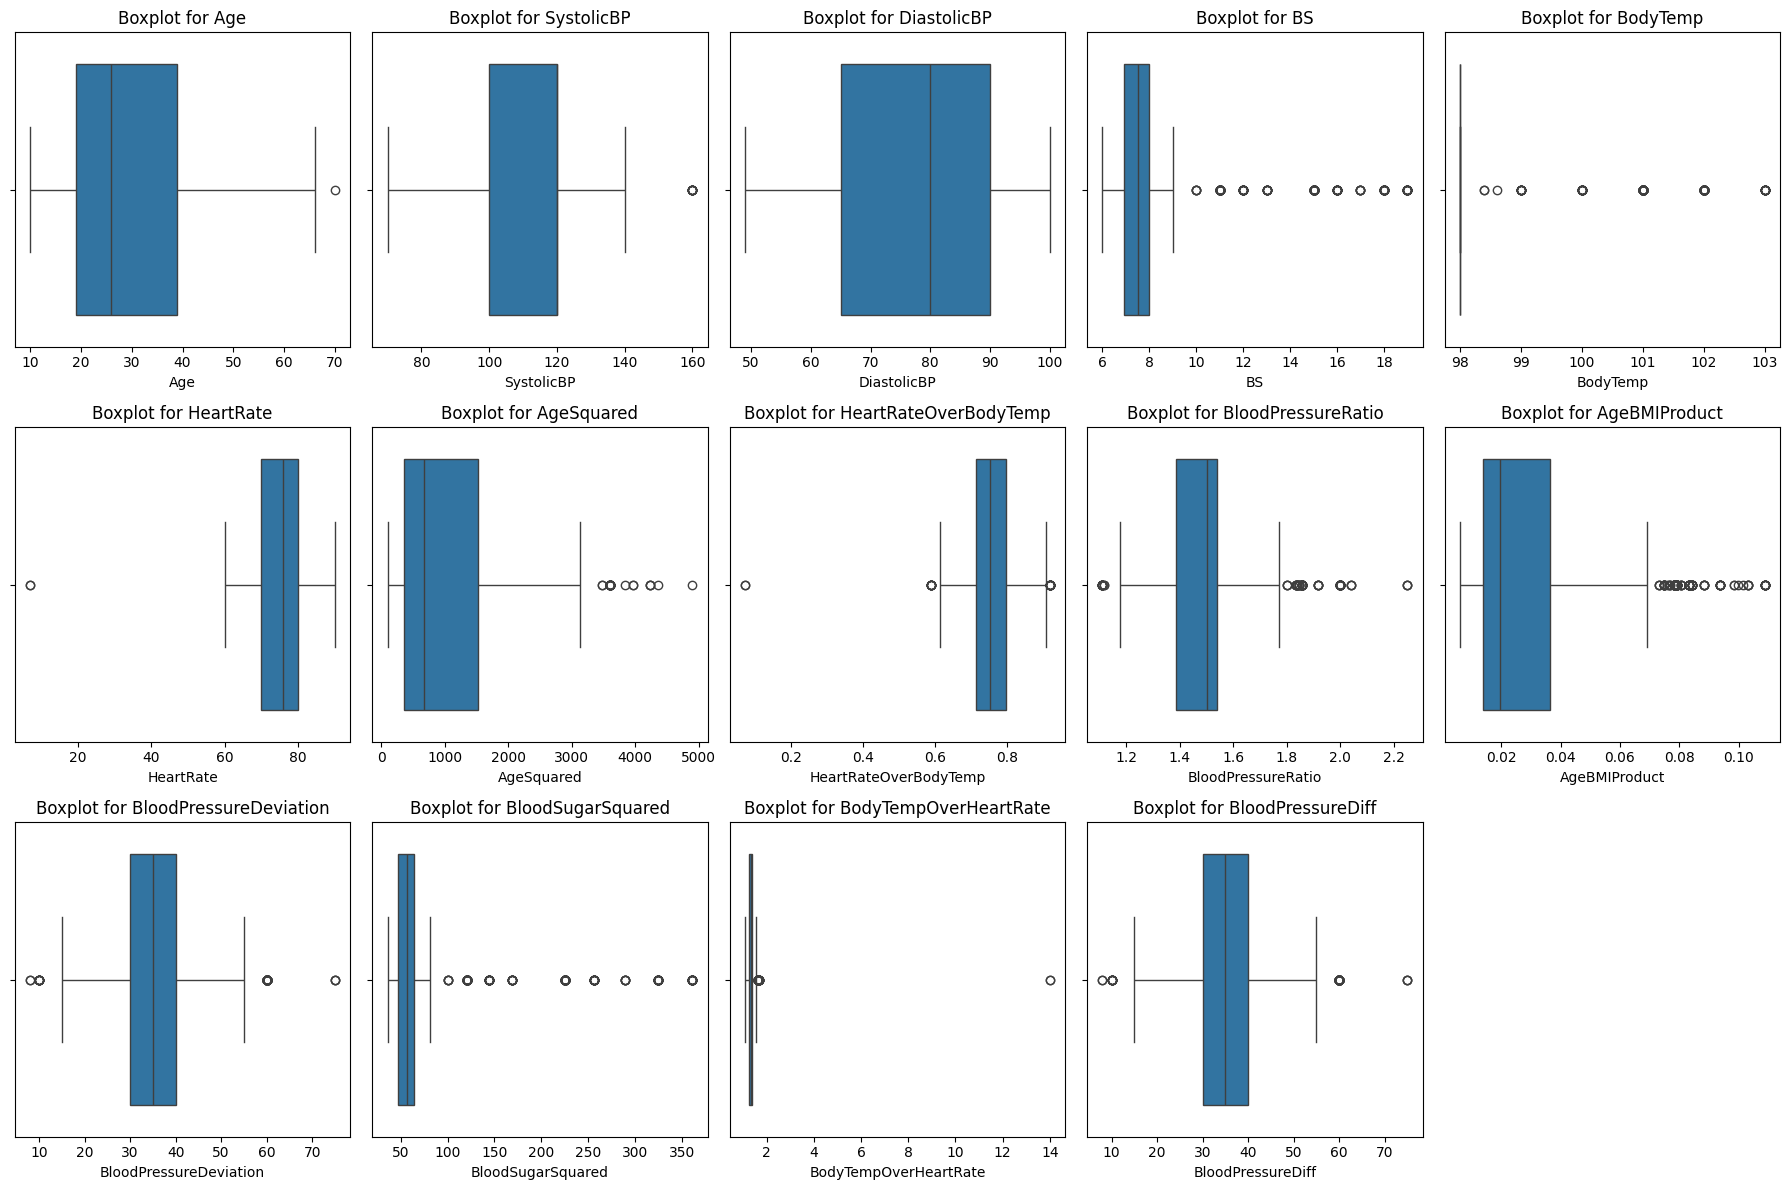

In [ ]:
# Selected columns for outlier detection
columns_for_outlier_detection = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
                                 'AgeSquared', 'HeartRateOverBodyTemp', 'BloodPressureRatio',
                                 'AgeBMIProduct', 'BloodPressureDeviation', 'BloodSugarSquared',
                                 'BodyTempOverHeartRate', 'BloodPressureDiff']

# Plot boxplots for outlier detection
plt.figure(figsize=(18, 12))
for i, column in enumerate(columns_for_outlier_detection, 1):
    plt.subplot(3, 5, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')

plt.tight_layout()
plt.show()

In [ ]:
outlier_column=['Age', 'SystolicBP', 'BS', 'BodyTemp', 'HeartRate',
                                 'AgeSquared', 'HeartRateOverBodyTemp', 'BloodPressureRatio',
                                 'AgeBMIProduct', 'BloodPressureDeviation', 'BloodSugarSquared',
                                 'BodyTempOverHeartRate', 'BloodPressureDiff']

In [ ]:
#determining the inter-quartile range for the columns with outliers
Q1 = df[outlier_column].quantile(0.25)
Q3 = df[outlier_column].quantile(0.75)
IQR = Q3-Q1

In [ ]:
# determining the upper and lower limit for the removal of outliers
upper_limit = Q3 + (1.5*IQR)
lower_limit = Q1 - (1.5*IQR)
df[outlier_column] = df[outlier_column][~((df[outlier_column] < lower_limit) | (df[outlier_column] > upper_limit))]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     1013 non-null   float64
 1   SystolicBP              1004 non-null   float64
 2   DiastolicBP             1014 non-null   int64  
 3   BS                      773 non-null    float64
 4   BodyTemp                804 non-null    float64
 5   HeartRate               1012 non-null   float64
 6   RiskLevel               1014 non-null   object 
 7   AgeSquared              919 non-null    float64
 8   HeartRateOverBodyTemp   985 non-null    float64
 9   BloodPressureRatio      861 non-null    float64
 10  AgeBMIProduct           858 non-null    float64
 11  BloodPressureDeviation  910 non-null    float64
 12  BloodSugarSquared       773 non-null    float64
 13  RiskScore               1014 non-null   float64
 14  BodyTempOverHeartRate   938 non-null    

In [ ]:
# Filling missing values in outlier columns with median
for column in outlier_column:
    df[column] = df[column].fillna(df[column].median())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     1014 non-null   float64
 1   SystolicBP              1014 non-null   float64
 2   DiastolicBP             1014 non-null   int64  
 3   BS                      1014 non-null   float64
 4   BodyTemp                1014 non-null   float64
 5   HeartRate               1014 non-null   float64
 6   RiskLevel               1014 non-null   object 
 7   AgeSquared              1014 non-null   float64
 8   HeartRateOverBodyTemp   1014 non-null   float64
 9   BloodPressureRatio      1014 non-null   float64
 10  AgeBMIProduct           1014 non-null   float64
 11  BloodPressureDeviation  1014 non-null   float64
 12  BloodSugarSquared       1014 non-null   float64
 13  RiskScore               1014 non-null   float64
 14  BodyTempOverHeartRate   1014 non-null   

#**Model Building**

In [ ]:
X=df[['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
      'AgeSquared', 'HeartRateOverBodyTemp',
       'BloodPressureRatio', 'AgeBMIProduct', 'BloodPressureDeviation',
       'BloodSugarSquared', 'RiskScore', 'BodyTempOverHeartRate',
       'BloodPressureDiff']]
# Assuming 'RiskLevel' is the target variable
le = LabelEncoder()
y = le.fit_transform(df['RiskLevel'])

##**Train Test Split**

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)

##**Feature Scaling**

In [ ]:
# Normalizing the Dataset using Standard Scaling Technique.
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

##**Algorithms Implementations**

##**Logistic Regression model**

In [ ]:
# Create Logistic Regression model
logreg_model = LogisticRegression(random_state=30)
logreg_model.fit(X_train, y_train)
# Make predictions on test
logreg_pred = logreg_model.predict(X_test)
logreg_pred_proba = logreg_model.predict_proba(X_test)[:, 1]


In [ ]:
# Evaluation on testing data
AS_logreg = accuracy_score(y_test, logreg_pred)
print("Testing Accuracy_Score:", round(AS_logreg,2))

Testing Accuracy_Score: 0.6


In [ ]:
# Generate Classification Report
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, logreg_pred))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.73      0.60      0.66        63
           1       0.57      0.77      0.65        77
           2       0.53      0.40      0.45        63

    accuracy                           0.60       203
   macro avg       0.61      0.59      0.59       203
weighted avg       0.61      0.60      0.59       203



Overall accuracy Logistic Regression: 60%, meaning the model correctly classifies 60% of the instances.

##**Random Forest model**

In [ ]:
#Importing Random Forest
rf_model= RandomForestClassifier(random_state=30)
rf_model= rf_model.fit(X_train, y_train)
#Making prediction for test
rf_pred= rf_model.predict(X_test)
rf_pred_proba= rf_model.predict_proba(X_test)[:,1]

In [ ]:
# Evaluation on testing data
AS_rf = accuracy_score(y_test, rf_pred)
print("Testing Accuracy_Score:", round(AS_rf,2))

Testing Accuracy_Score: 0.85


In [ ]:
# Generate Classification Report
print("Classification Report Random Forest:")
print(classification_report(y_test, rf_pred))

Classification Report Random Forest:
              precision    recall  f1-score   support

           0       0.90      0.87      0.89        63
           1       0.89      0.86      0.87        77
           2       0.76      0.83      0.79        63

    accuracy                           0.85       203
   macro avg       0.85      0.85      0.85       203
weighted avg       0.86      0.85      0.85       203



Overall accuracy Random Forest: 85%, indicating it correctly classifies 85% of the instances.

##**LGBM model**

In [ ]:
# Create LGBM model
lgb_model = LGBMClassifier(random_state=30)
# Fit the model
lgb_model.fit(X_train, y_train)
# Make predictions on test
lgb_pred_test = lgb_model.predict(X_test)
lgb_pred_proba_test = lgb_model.predict_proba(X_test)[:, 1]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000086 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 522
[LightGBM] [Info] Number of data points in the train set: 811, number of used features: 14
[LightGBM] [Info] Start training from score -1.355934
[LightGBM] [Info] Start training from score -0.902210
[LightGBM] [Info] Start training from score -1.088796
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

In [ ]:
# Evaluate on testing dataset
print("Evaluation Metrics for LGBM")
accuracy_lgb = accuracy_score(y_test, lgb_pred_test)
print("Accuracy: {:.2f}".format(accuracy_lgb))

Evaluation Metrics for LGBM
Accuracy: 0.85


In [ ]:
# Print Classification Report for LGBM Model
print("Classification Report for LGBM Model:")
print(classification_report(y_test, lgb_pred_test))

Classification Report for LGBM Model:
              precision    recall  f1-score   support

           0       0.89      0.90      0.90        63
           1       0.86      0.83      0.85        77
           2       0.78      0.81      0.80        63

    accuracy                           0.85       203
   macro avg       0.85      0.85      0.85       203
weighted avg       0.85      0.85      0.85       203



Overall accuracy LGBM: 85%, indicating it correctly classifies 85% of the instances.
Class-wise performance: Generally strong across all classes, with precision and recall around 0.85 or higher.

Class 0: Highest scores (precision 0.89, recall 0.90, F1-score 0.90).

class 1: Highest scores (precision 0.86, recall 0.83, F1-sore 0.85

Class 2: Slightly lower scores (precision 0.78, recall 0.81, F1-score 0.80), suggesting potential room for improvement.

Balanced performance: Macro and weighted averages closely align with overall accuracy, indicating consistent performance across classes.

##**Catboost model**

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.9 MB/s eta 0:00:00


In [ ]:
# Create CatBoost model
catboost_model = CatBoostClassifier(random_state=30)
catboost_model.fit(X_train, y_train)

Learning rate set to 0.078286
0:	learn: 1.0556663	total: 15.7ms	remaining: 15.7s
1:	learn: 1.0197769	total: 20.4ms	remaining: 10.2s
2:	learn: 0.9902148	total: 24.5ms	remaining: 8.15s
3:	learn: 0.9643053	total: 28.6ms	remaining: 7.12s
4:	learn: 0.9377711	total: 31ms	remaining: 6.17s
5:	learn: 0.9215030	total: 33.9ms	remaining: 5.62s
6:	learn: 0.8971753	total: 40.5ms	remaining: 5.75s
7:	learn: 0.8739980	total: 44.3ms	remaining: 5.49s
8:	learn: 0.8553257	total: 46.8ms	remaining: 5.15s
9:	learn: 0.8410442	total: 50.5ms	remaining: 5s
10:	learn: 0.8243593	total: 58.4ms	remaining: 5.25s
11:	learn: 0.8087256	total: 62ms	remaining: 5.1s
12:	learn: 0.7981351	total: 64.8ms	remaining: 4.92s
13:	learn: 0.7889205	total: 67.3ms	remaining: 4.74s
14:	learn: 0.7752946	total: 71.9ms	remaining: 4.72s
15:	learn: 0.7650814	total: 76.1ms	remaining: 4.68s
16:	learn: 0.7558206	total: 82.4ms	remaining: 4.77s
17:	learn: 0.7464929	total: 89.2ms	remaining: 4.87s
18:	learn: 0.7403818	total: 96.5ms	remaining: 4.98s


In [ ]:
# Make predictions on the testing dataset
catboost_pred = catboost_model.predict(X_test)
catboost_pred_proba = catboost_model.predict_proba(X_test)[:, 1]

In [ ]:
# Evaluate the model
accuracy_catboost = accuracy_score(y_test, catboost_pred)
print("Accuracy: {:.2f}".format(accuracy_catboost))

Accuracy: 0.86


In [ ]:
# Print Classification Report for CatBoost Model
print("Classification Report for CatBoost Model:")
print(classification_report(y_test, catboost_pred))

Classification Report for CatBoost Model:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        63
           1       0.87      0.87      0.87        77
           2       0.80      0.81      0.80        63

    accuracy                           0.86       203
   macro avg       0.86      0.86      0.86       203
weighted avg       0.86      0.86      0.86       203



Overall accuracy Catboost: 86%, meaning it correctly classifies 86% of the instances.
Class-wise performance:

Class 0: Highest precision and F1-score (0.92 and 0.91, respectively).

Class 1: Strong scores, closely following Class 0.

Class 2: Slightly lower precision and recall (0.80), but still acceptable performance.

Balanced performance: Macro and weighted averages align with overall accuracy, indicating consistent performance across classes.

Slightly better performance: It shows a marginal improvement over the LGBM model, particularly for Class 0.

##**Conclusion**

## **Conclusion:**

The analysis and modeling performed on the dataset reveal significant insights into the relationships between various health parameters and risk levels. The project successfully demonstrates that younger individuals generally exhibit lower risk levels, while older individuals and those with higher blood sugar and variability in heart rates are more likely to fall into the high-risk category.

#### **Implementation of Algorithms**

* Logistic Regression

* Random Forest

* LGBM

* CatBoost

Out of this, CatBoost provided the best classification performance, highlighting its effectiveness in handling the dataset's complexities.

#**Interactive Q&A Session**

**1.Age and Risk Relationship:**

Question: Can you elaborate on the factors contributing to the positive correlation between age and risk level?

**2.Blood Sugar Levels Variability:**

Question: Regarding the variability in blood sugar levels within the high-risk group, what potential factors or medical conditions could contribute to this variation?

**3.Heart Rate and High-Risk Individuals:**

Question: What physiological or medical conditions could explain the positive correlation between heart rate and risk level?

**4.Distribution of Risk Levels:**

Question: With the majority of data points falling under the lower risk categories, can you discuss any trends or patterns in the characteristics of individuals in the low-risk group that stand out in the analysis?

**5.Body Temperature Overlap:**

Question: Considering the overlap in body temperatures between high and low-risk groups, are there specific instances or conditions where body temperature alone might not be a reliable indicator of pregnancy risk?

**6.Age and Blood Glucose Levels:**

Question: Could you provide insights into why there is a positive correlation between age and blood glucose levels across all risk levels? How does this relationship change with age?

**8.Diastolic Blood Pressure in High-Risk Individuals:**

Question: What are the implications of high diastolic blood pressure readings in high-risk individuals? Are there specific health concerns associated with this observation?

**9.Systolic Blood Pressure Trends:**

Question: Considering the general trend that high-risk individuals have higher systolic blood pressure at ages, what implications does this have on the cardiovascular health of pregnant women in the high-risk category?